###RNN SFS

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('drive/MyDrive/Final_data_CKD_PP.csv')

In [ ]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,1,1,0,0,121,...,44,7800,5.2,1,2,0,0,0,0,0
1,7,50,1.020,4,0,1,1,0,0,121,...,38,6000,4.8,0,1,0,0,0,0,0
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,4.8,0,2,0,1,0,1,0
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3.9,1,1,0,1,1,1,0
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4.6,0,1,0,0,0,0,0


In [ ]:
dataset = dataset[['age','bp','sg','al','pc','ba','sod','hemo','pcv','wc','htn','dm','appet','pe','ane','classification']] #forward SNS

In [ ]:
dataset

,age,bp,sg,al,pc,ba,sod,hemo,pcv,wc,htn,dm,appet,pe,ane,classification
0,48,80,1.020,1,1,0,138.0,15.4,44,7800,1,2,0,0,0,0
1,7,50,1.020,4,1,0,138.0,11.3,38,6000,0,1,0,0,0,0
2,62,80,1.010,2,1,0,138.0,9.6,31,7500,0,2,1,0,1,0
3,48,70,1.005,4,0,0,111.0,11.2,32,6700,1,1,1,1,1,0
4,51,80,1.010,2,1,0,138.0,11.6,35,7300,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,1,0,150.0,15.7,47,6700,0,1,0,0,0,1
396,42,70,1.025,0,1,0,141.0,16.5,54,7800,0,1,0,0,0,1
397,12,80,1.020,0,1,0,137.0,15.8,49,6600,0,1,0,0,0,1
398,17,60,1.025,0,1,0,135.0,14.2,51,7200,0,1,0,0,0,1


In [ ]:
dataset.shape

(400, 16)

In [ ]:
dataset.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

In [ ]:
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
X

array([[48.   , 80.   ,  1.02 , ...,  0.   ,  0.   ,  0.   ],
       [ 7.   , 50.   ,  1.02 , ...,  0.   ,  0.   ,  0.   ],
       [62.   , 80.   ,  1.01 , ...,  1.   ,  0.   ,  1.   ],
       ...,
       [12.   , 80.   ,  1.02 , ...,  0.   ,  0.   ,  0.   ],
       [17.   , 60.   ,  1.025, ...,  0.   ,  0.   ,  0.   ],
       [58.   , 80.   ,  1.025, ...,  0.   ,  0.   ,  0.   ]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape

(300, 15)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_test.shape

(100, 15)

In [ ]:
y_test.shape

(100,)

In [ ]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [ ]:
# SimpleRNN model
import time
start_time = time.time()
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(X_train.shape[1],1), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics = ['accuracy'])
model.fit(X_train,y_train, epochs=100, batch_size=16, verbose=2, validation_data=(X_test, y_test),)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
19/19 - 2s - loss: 0.3555 - accuracy: 0.6167 - val_loss: 0.2868 - val_accuracy: 0.6500 - 2s/epoch - 98ms/step
Epoch 2/100
19/19 - 0s - loss: 0.2202 - accuracy: 0.6600 - val_loss: 0.1115 - val_accuracy: 0.9500 - 109ms/epoch - 6ms/step
Epoch 3/100
19/19 - 0s - loss: 0.1008 - accuracy: 0.8967 - val_loss: 0.0987 - val_accuracy: 0.9100 - 106ms/epoch - 6ms/step
Epoch 4/100
19/19 - 0s - loss: 0.0870 - accuracy: 0.8967 - val_loss: 0.0802 - val_accuracy: 0.9200 - 109ms/epoch - 6ms/step
Epoch 5/100
19/19 - 0s - loss: 0.0796 - accuracy: 0.9033 - val_loss: 0.0621 - val_accuracy: 0.9300 - 112ms/epoch - 6ms/step
Epoch 6/100
19/19 - 0s - loss: 0.0673 - accuracy: 0.9133 - val_loss: 0.0469 - val_accuracy: 0.9500 - 108ms/epoch - 6ms/step
Epoch 7/100
19/19 - 0s - loss: 0.0520 - accuracy: 0.9433 - val_loss: 0.0359 - val_accuracy: 0.9900 - 105ms/epoch - 6ms/step
Epoch 8/100
19/19 - 0s - loss: 0.0461 - accuracy: 0.9600 - val_loss: 0.0321 - val_accuracy: 0.9600 - 101ms/epoch - 5ms/step
Epoch 9/10

###plot

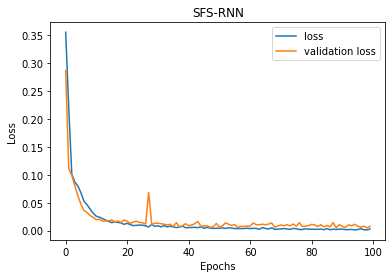

In [27]:
import matplotlib.pyplot as plt

fig = plt.gcf()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('SFS-RNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('SFS-RNN.png', dpi=100)

In [28]:
from google.colab import files
files.download('SFS-RNN.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        65
           1       0.94      0.97      0.96        35

    accuracy                           0.97       100
   macro avg       0.96      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [ ]:
print(confusion_matrix(y_test,predictions))

[[63  2]
 [ 1 34]]


In [ ]:
cnf_matrix = [[63, 2],[1, 34]]

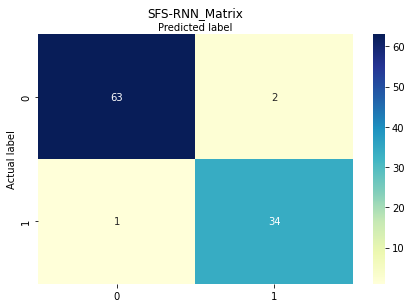

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('SFS-RNN_Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('SFS-RNN_Matrix.png')
plt.show()

In [ ]:
from google.colab import files
files.download('SFS-RNN_Matrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from google.colab import files
# files.download('ann_Boruta_output.csv') 